<a href="https://colab.research.google.com/github/20104047TranThiMyNgoc/AI-Subject/blob/main/m%C3%B3n_%C4%83n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/BT/mon_an

/content/drive/MyDrive/Colab Notebooks/BT/nhan_mon_an


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT/mon_an/train',target_size=(100,100), batch_size=32, class_mode='categorical')

Found 589 images belonging to 10 classes.


In [ ]:
# Tạo bộ dữ liệu validation
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT/mon_an/Validation',target_size=(100,100), batch_size=32, class_mode='categorical')

Found 589 images belonging to 1 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'banh mi': 0,
 'banh trang tron': 1,
 'banh xeo': 2,
 'bun dau mam tom': 3,
 'canh kho qua': 4,
 'chan ga nuong': 5,
 'che': 6,
 'pho': 7,
 'thit kho trung': 8,
 'vit quay': 9}

In [ ]:
# Các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'Validation': 0}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(100,100,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 10 tín hiệu ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/100
19/19 [==============================] - 891s 48s/step - loss: 3.2351 - accuracy: 0.1019 - val_loss: 23.0498 - val_accuracy: 0.0000e+00
Epoch 2/100
19/19 [==============================] - 13s 730ms/step - loss: 2.2253 - accuracy: 0.1511 - val_loss: 25.5275 - val_accuracy: 0.0000e+00
Epoch 3/100
19/19 [==============================] - 13s 727ms/step - loss: 2.0447 - accuracy: 0.1935 - val_loss: 28.3874 - val_accuracy: 0.0034
Epoch 4/100
19/19 [==============================] - 15s 798ms/step - loss: 1.9720 - accuracy: 0.2513 - val_loss: 30.2824 - val_accuracy: 0.0357
Epoch 5/100
19/19 [==============================] - 13s 714ms/step - loss: 1.8841 - accuracy: 0.3073 - val_loss: 29.0143 - val_accuracy: 0.0017
Epoch 6/100
19/19 [==============================] - 13s 727ms/step - loss: 1.8155 - accuracy: 0.3107 - val_loss: 34.1819 - val_accuracy: 0.2224
Epoch 7/100
19/19 [==============================] - 13s 727ms/step - loss: 1.7384 - accuracy: 0.3531 - val_loss: 32.6225 -

In [ ]:
# Lưu lại
model.save("nhan_dien_mon_an.h5")

In [ ]:
# Tải mô hình 
model_CNN=load_model('nhan_dien_mon_an.h5')

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model_CNN.evaluate(training_set,verbose = 0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.457059383392334
Train Accuracy 0.8488964438438416


<function matplotlib.pyplot.show(*args, **kw)>

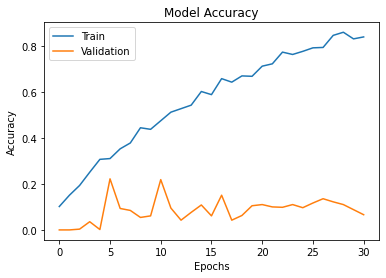

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
test1="/content/drive/MyDrive/Colab Notebooks/BT/mon_an/Test/Test 1/Test1"
test2=""
test = [test1, test2]
stt = 0
for j in test:
  stt += 1
  for i in os.listdir(j):
    img=load_img(j+'/'+i,target_size=(100,100))
    print(img)
    plt.imshow(img)
    img=img_to_array(img)
    img=img.astype('float32')
    img=img/255
    img=np.expand_dims(img,axis=0)
    result=model_CNN.predict(img)
    if round(result[0][0])==1:
      prediction='banh mi'
    if round(result[0][1])==1:
      prediction='banh trang tron'
    if round(result[0][2])==1:
      prediction='banh xeo'
    if round(result[0][3])==1:
      prediction='bun dau manm tom'
    if round(result[0][4])==1:
      prediction='canh kho qua'
    if round(result[0][5])==1:
      prediction='chan ga nuong'
    if round(result[0][6])==1:
      prediction='che'
    if round(result[0][7])==1:
      prediction='pho'
    if round(result[0][8])==1:
      prediction='thit kho trung'
    if round(result[0][9])==1:
      prediction='vit quay'
    print('Ten mon an:',prediction)
    print(f'Chu thich: Du lieu nam trong Test{stt}')
    plt.show()

FileNotFoundError: ignored